# MIRA Ingestion, Term lookup, and literature search

In [1]:
import requests
from IPython import display
from base64 import b64decode
import pandas as pd
import json

API_BASE="http://xdddev.chtc.io/askem/"

# Table search and extraction
COSMOS extractions are now being stored within the primary ASKEM datastore. Simple text-based searching (contents, captions, and within-text context) is currently enabled.

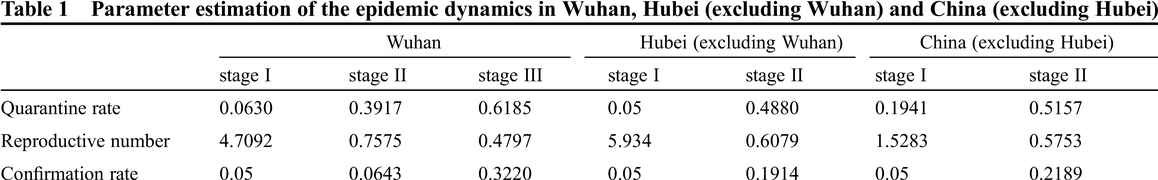

In [10]:
url = f"{API_BASE}object?askem_class=Table&contentText=parameter estimation"
resp = requests.get(url)
data = resp.json()
result = data["success"]["data"][0] # Let's take a look at the first table in the response.
display.Image(b64decode(result['properties']['image']))

Included in the response is a representation of the table as a pandas dataframe, stored a column-oriented JSON. Although the extractions are imperfect, they are often sufficient to extract relevant values with ease.

In [11]:
df = pd.read_json(json.dumps(result['properties']['contentJSON']))
df

,0,1,2,3,4,5,6,7
0,Table 1,Parameter estimation of the epidemic dynamics ...,,,,,,
1,,,Wuhan,,,Hubei (excluding Wuhan),,China (excluding Hubei)
2,,stage I,stage II,stage III,stage I,stage II,stage I,stage II
3,Quarantine rate,0.0630,0.3917,0.6185,0.05,0.4880,0.1941,0.5157
4,Reproductive number,4.7092,0.7575,0.4797,5.934,0.6079,1.5283,0.5753
5,Conﬁrmation rate,0.05,0.0643,0.3220,0.05,0.1914,0.05,0.2189


Another table result, with retrieval via ASKE-ID instead of by query. Not that COSMOS extracted both Table 2 and Table 3 as one "Table" object. Additionally, the extraction utility could not cleanly delineate columns. Still, simple code (or copy/pasting) can ease extraction of parameter values and ranges.

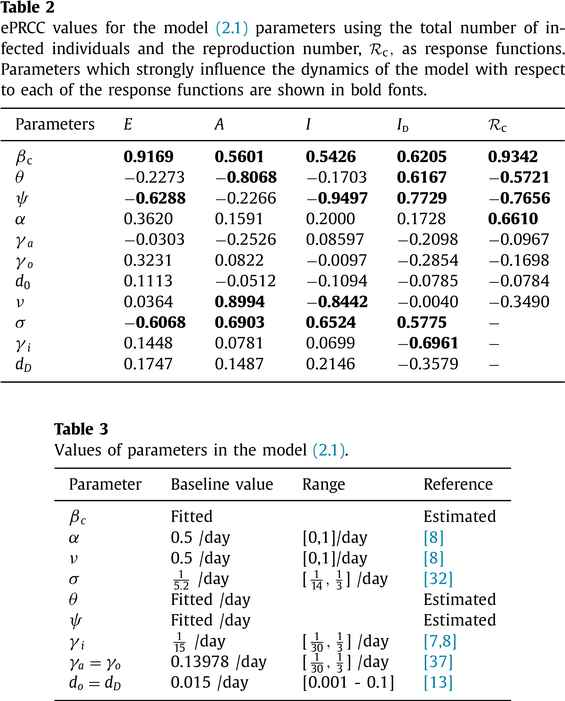

In [6]:
url = f"{API_BASE}/object/0842faf6-c659-4604-b553-55d8bfbe928d"
resp = requests.get(url)
data = resp.json()
result = data["success"]["data"][0]
display.Image(b64decode(result['properties']['image']))

In [12]:
df = pd.read_json(json.dumps(result['properties']['contentJSON']))
df

,0,1,2,3,4,5,6,7
0,Table 1,Parameter estimation of the epidemic dynamics ...,,,,,,
1,,,Wuhan,,,Hubei (excluding Wuhan),,China (excluding Hubei)
2,,stage I,stage II,stage III,stage I,stage II,stage I,stage II
3,Quarantine rate,0.0630,0.3917,0.6185,0.05,0.4880,0.1941,0.5157
4,Reproductive number,4.7092,0.7575,0.4797,5.934,0.6079,1.5283,0.5753
5,Conﬁrmation rate,0.05,0.0643,0.3220,0.05,0.1914,0.05,0.2189


# Parameter lookup
We have ingested a handful of simplified objects of type "Parameter." We have manually tagged these with domain IDs, with a domain of OCTDEMO.

In [9]:
url = f"{API_BASE}object?askem_class=Parameter&domain_tag=OCTDEMO"
resp = requests.get(url)
data = resp.json()
data

{'success': {'v': 1,
  'data': [{'ASKEM_CLASS': 'Parameter',
    'properties': {'primaryName': 'regional population',
     'description': 'the number of people who live in the area being modeled',
     'value': 0.0,
     'type': 'int',
     'min': 1000,
     'max': 40000000,
     'unit': 'people',
     'rawLocation': '',
     'populationMetadata': ''},
    'DOMAIN_TAGS': ['OCTDEMO:0001'],
    'ASKEM_ID': '24ec75f5-cd7b-423b-9444-35e30d15744f',
    '_xdd_created': '2022-10-06T14:14:03.648864',
    '_xdd_registrant': 1},
   {'ASKEM_CLASS': 'Parameter',
    'properties': {'primaryName': 'doubling time',
     'description': 'the number of days that the disease requires to double',
     'value': 0.0,
     'type': 'float',
     'min': 0.1,
     'max': 60,
     'unit': '',
     'rawLocation': '',
     'populationMetadata': ''},
    'DOMAIN_TAGS': ['OCTDEMO:0002'],
    'ASKEM_ID': '28ade90d-8f04-4e17-b10a-fe803ec8a3a6',
    '_xdd_created': '2022-10-06T14:14:03.682034',
    '_xdd_registrant': 1

# Step 3: Object Registration